## Loading Data from local file

Testing basic models with newly added language-related features.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./XYmat_lang.csv')

In [3]:
df.head(5)

,name,reviews,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,...,Finnish,Norwegian,Swedish,Greek,Bulgarian,Romanian,Unnamed: 411,Vietnamese,Slovakian,number of languages
0,DOOM,92,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,17
2,BATTLETECH,71,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
3,DayZ,61,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,9
4,EVE Online,74,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4


In [4]:
df.columns

Index(['name', 'reviews', 'FPS', 'Gore', 'Action', 'Demons', 'Shooter',
       'First-Person', 'Great Soundtrack', 'Multiplayer',
       ...
       'Finnish', 'Norwegian', 'Swedish', 'Greek', 'Bulgarian', 'Romanian',
       'Unnamed: 411', 'Vietnamese', 'Slovakian', 'number of languages'],
      dtype='object', length=415)

In [5]:
df.index

RangeIndex(start=0, stop=11766, step=1)

In [6]:
df.values

array([['DOOM', 92, 1, ..., 0, 0, 10],
       ["PLAYERUNKNOWN'S BATTLEGROUNDS", 49, 1, ..., 0, 0, 17],
       ['BATTLETECH', 71, 0, ..., 0, 0, 4],
       ...,
       ['STAX', 99, 0, ..., 0, 0, 6],
       ['Chicken Farm 2K17 - Premium', 96, 0, ..., 0, 0, 1],
       ['TANE DLC - ZecRail 2017 Christmas Train', 100, 0, ..., 0, 0, 4]],
      dtype=object)

In [7]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[1 1 1 ... 0 0 10]
 [1 0 1 ... 0 0 17]
 [0 0 1 ... 0 0 4]
 ...
 [0 0 0 ... 0 0 6]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 4]]


## Split train test data

In [8]:
num_train = len(df) // 10 * 7

Xtrain = X[:num_train]
Xtest = X[num_train:]
ytrain = y[:num_train]
ytest = y[num_train:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(8232, 413) (3534, 413) (8232,) (3534,)


## Test data with multiple linear regression

In [9]:
import scipy as sp
import scipy.sparse.linalg
import math

In [10]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(413,)


## Compute Baseline

In [11]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.5e}".format(avgL))

multiple variable loss=2.33484e+01


In [12]:
## Compute loss with linear regression

In [13]:
yp = Xtest@beta
errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(errs)

print("multiple variable loss="+"{:.5e}".format(avgL))
arr = []

for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.36273e+01
83.9999350737325
83.21990339243092
82.88055597361532
80.65240706089777
77.92773219670482
77.30817573389389
76.73537745137453
75.71373308944015
74.73537745137453
74.226765052191
73.93183595807116
72.88047447176645
72.36154616442803
72.02164436193438
71.95964153084593
71.65184771711296
71.23663956768313
71.0563480528769
71.02005169324576
70.94618907977085
70.68261844454625
70.51341466656942
70.15883535894827
70.05611470145051
69.49257175518902
69.30066487112384
68.98632526927017
68.93183595807116
68.93183595807116
68.64209235405309
68.63681002502088
68.4868717173364
68.45209622588095
68.22957022683725
67.93724622470535
67.93476326273016
67.86646818370829
67.72327024540697
67.63346413600082
67.32824260759267
67.32162818496897
67.29543651927779
66.82036312526934
66.65814406407267
66.56765418953626
66.06457435987758
66.03751462137177
65.6393206630817
65.35458394302812
65.18906996133535


In [14]:
import matplotlib.pyplot as plt



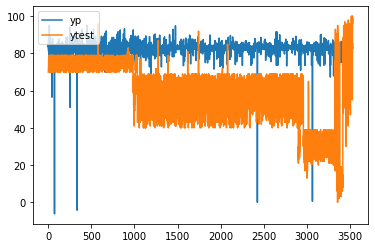

In [15]:
plt.plot(yp, label = "yp")
plt.plot(ytest, label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
#axes.set_xlim([0,500])
#axes.set_ylim([60,100])
plt.show()

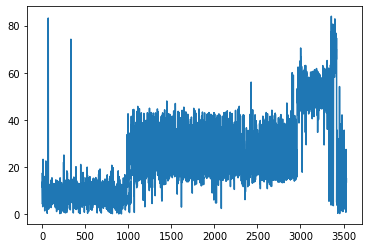

In [16]:
plt.plot(errs)

In [17]:
print(np.mean(errs))

23.627275654428022
